In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
db = conn.get_database('Lianjia')  # 连接到Lianjia数据库

zufang = db.get_collection('zufang') # 连接到集合zufang
mon_data = zufang.find()  # 查询这个集合下的所有记录

In [3]:
data = json_normalize([comment for comment in mon_data])

In [4]:
data.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c7118b9397be4c52519eec1,1,1,和平里,北京,朝阳,686,南 北,1,近地铁 集中供暖 随时看房,林调社区 1室1厅 6500元,39.963209,1室1厅1卫,116.432585,https://m.lianjia.com/chuzu/bj/zufang/BJ217071...,43,6500,元/月,林调社区,整租
1,5c7118bc397be4c52519eec5,1,2,永定门,北京,东城,478,南 北,1,近地铁 新上 随时看房,整租 · 东革新里40号院 2室1厅 5300元,39.872127,2室1厅1卫,116.403511,https://m.lianjia.com/chuzu/bj/zufang/BJ219051...,58,5300,元/月,东革新里40号院,整租
2,5c7118be397be4c52519eec7,1,3,东直门,北京,朝阳,None,南 北,1,近地铁 集中供暖 随时看房,外大街南北向三居，采光好，精装修,39.947027,3室1厅1卫,116.448231,https://m.lianjia.com/chuzu/bj/zufang/BJ219338...,70,9700,元/月,东直门外大街(东城）,整租
3,5c7118c0397be4c52519eec9,1,2,广渠门,北京,朝阳,707,东南 北,1,近地铁 精装 随时看房,整租 · 安化南里 2室1厅 7000元,39.895226,2室1厅1卫,116.441521,https://m.lianjia.com/chuzu/bj/zufang/BJ219340...,63,7000,元/月,安化南里,整租
4,5c7118c1397be4c52519eecb,1,1,崇文门,北京,东城,292,南,0,近地铁 集中供暖 新上 随时看房,整租 · 兴隆都市馨园 1室0厅 5000元,39.901616,1室0厅1卫,116.420099,https://m.lianjia.com/chuzu/bj/zufang/BJ219346...,28,5000,元/月,兴隆都市馨园,整租


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105262 entries, 0 to 105261
Data columns (total 20 columns):
_id                   105262 non-null object
bathroom_num          105262 non-null object
bedroom_num           105262 non-null object
bizcircle_name        105262 non-null object
city                  105262 non-null object
dist                  105262 non-null object
distance              57938 non-null object
frame_orientation     105262 non-null object
hall_num              105262 non-null object
house_tag             85090 non-null object
house_title           105262 non-null object
latitude              104844 non-null object
layout                105262 non-null object
longitude             104844 non-null object
m_url                 105262 non-null object
rent_area             105262 non-null object
rent_price_listing    105262 non-null object
rent_price_unit       105262 non-null object
resblock_name         105262 non-null object
type                  105262 non-nul

In [10]:
# 每个城市各采样3000条数据，保存为csv文件
data_sample = pd.concat([data[data['city']==city].sample(3000) for city in ['北京', '上海', '广州', '深圳']])
data_sample.to_csv('data_sample.csv', index=False)

In [6]:
# 数据清洗(按列清理)
# 1. 去掉“_id”列
data = data.drop(columns='_id')

In [7]:
# 2. bathroom_num
data['bathroom_num'].unique()

array(['1', '2', '3', '0', '5', '4', '6', '7', '8', '9', '11'],
      dtype=object)

In [8]:
data[data['bathroom_num'].isin(['8','9','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
5988,8,9,四季青,北京,海淀,725,南 西 北,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,318,158000,元/月,Wehouse,整租
10900,9,9,北七家,北京,昌平,None,东 南 西 北,5,精装,整租 · 精装修独栋别墅，家具家电齐全，可直接入住！,40.146554,9室5厅9卫,116.418277,https://m.lianjia.com/chuzu/bj/zufang/BJ203027...,544,40000,元/月,麦卡伦地,整租
17908,8,8,蓬莱公园,上海,黄浦,517,南,2,近地铁 新上,华浩苑 8室2厅 13500元,31.213343,8室2厅8卫,121.491824,https://m.lianjia.com/chuzu/sh/zufang/SH219612...,246,13500,元/月,华浩苑,整租
29932,8,6,龙柏,上海,闵行,528,南 北,3,近地铁,整租 · 性价别墅，可整租可分层出租，价格可谈，看房方便！,31.18634,6室3厅8卫,121.373958,https://m.lianjia.com/chuzu/sh/zufang/SH215562...,949,75000,元/月,汇金公寓,整租
33271,8,8,莘闵别墅,上海,松江,None,南,4,None,桃花源田庄 精装修 拎包入住 可办公可居家 看房随时,31.101212,8室4厅8卫,121.354455,https://m.lianjia.com/chuzu/sh/zufang/SH219030...,504,48000,元/月,桃花源田庄,整租
35726,8,8,赵巷,上海,青浦,None,未知,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
55273,11,2,东湖,广州,越秀,260,南 北,1,None,大沙头路两房 采光通风好,23.120535,2室1厅11卫,113.290942,https://m.lianjia.com/chuzu/gz/zufang/GZ216230...,60,4000,元/月,大沙头路,整租
61178,8,9,洛溪,广州,番禺,466,东南,1,近地铁,海天花园 9室1厅 15000元,23.05049,9室1厅8卫,113.301623,https://m.lianjia.com/chuzu/gz/zufang/GZ212158...,150,15000,元/月,海天花园,整租
63591,8,8,石基,广州,番禺,None,东南,3,None,富怡四区 8室3厅 25000元,22.965311,8室3厅8卫,113.447405,https://m.lianjia.com/chuzu/gz/zufang/GZ214634...,604,25000,元/月,富怡四区,整租
65091,8,9,白云大道南,广州,白云,594,南 北,3,近地铁,珠江岭南苑 南北向 视野开阔景观好,23.202732,9室3厅8卫,113.286666,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,500,80000,元/月,珠江岭南苑,整租


In [9]:
# 除了55273行是异常数据外，其它数据都正常
data = data.drop([55273])

In [10]:
# 3. bedroom_num
data['bedroom_num'].unique()

array(['1', '2', '3', '4', '6', '5', '9', '7', '8', '0', '10', '12', '15',
       '20', '14', '11', '13'], dtype=object)

In [11]:
# 没有异常数据，只是很多10室以上都是专门用来合租的
data[data['bedroom_num'].isin(['10','11','12','13','14','15','20'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
21378,4,10,长征,上海,普陀,1125,南,2,新上,名邸联排别墅，三层十室，精装全配拎包入住，诚意出租,31.25033037,10室2厅4卫,121.3845601,https://m.lianjia.com/chuzu/sh/zufang/SH219480...,228,23000,元/月,祥和名邸(别墅),整租
31034,3,10,嘉定新城,上海,嘉定,405,南,4,近地铁 精装,整租 · 阳光葡提公馆 14房间3卫 13500元,31.33711314,10室4厅3卫,121.2949683,https://m.lianjia.com/chuzu/sh/zufang/SH213808...,312,13500,元/月,阳光葡提公馆,整租
58474,3,12,滨江东,广州,海珠,711,北,2,近地铁 精装,整租 · 珠江帝景 装修保养好,23.110206,12室2厅3卫,113.333391,https://m.lianjia.com/chuzu/gz/zufang/GZ202798...,530,50000,元/月,珠江帝景苑克莱国际公寓灏景轩,整租
60547,1,15,会江,广州,番禺,None,南,1,精装,整租 · 公寓 电梯房 干净舒适 格局方正,23.008658,15室1厅1卫,113.310885,https://m.lianjia.com/chuzu/gz/zufang/GZ213259...,408,25000,元/月,敏捷御峰国际,整租
75268,8,20,滨江东,广州,海珠,968,南,2,公寓 近地铁 精装 新上 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ219842...,10,1300,元/月,珠江广场,合租
75290,8,20,滨江东,广州,海珠,968,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,10,1600,元/月,珠江广场,合租
75292,8,20,滨江东,广州,海珠,968,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,12,1800,元/月,珠江广场,合租
75293,8,20,滨江东,广州,海珠,968,北,2,公寓 近地铁 精装 独立阳台 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,2500,元/月,珠江广场,合租
75294,8,20,滨江东,广州,海珠,968,南,2,公寓 近地铁 精装 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,12,1600,元/月,珠江广场,合租
75295,8,20,滨江东,广州,海珠,968,南,2,公寓 近地铁 精装 随时看房,合租 · 珠江广场 20室2厅 复式,23.108886,20室2厅8卫,113.316313,https://m.lianjia.com/chuzu/gz/zufang/GZ202833...,15,1600,元/月,珠江广场,合租


In [12]:
# 4. distance
data['frame_orientation'].unique()  # 这个数据太乱了，要用的时候再处理吧

array(['南 北', '东南 北', '南', '北', '西南', '东 西', '西', '东南', '东', '西北', '东 北',
       '东北', '东 南 北', '东 南 西', '南 西 北', '东南 西北 北', '西 北', '南 西', '南 西南',
       '东 西 北', '东 南', '东 东南', '东 西南', '西南 西', '东 南 西 北', '东 东南 南',
       '东 西北', '西 西北', '西南 北', '东南 南', '东南 西', '西北 北', '东 西 西北', '西南 东北',
       '东 东北', '西 东北', '南 西北', '东南 西北', '东南 西南', '西南 西北', '东南 西南 西 北',
       '东南 东北', '西北 东北', '东南 南 西南', '东 北 东北', '东 西南 西', '南 东北', '东南 西 北',
       '东 南 西南', '南 西北 北', '西 西北 北', '北 东北', '东南 西南 西', '未知', '南 西南 北',
       '东南 南 北', '东 东南 南 西南', '南 西南 西 北', '东 西北 北', '东 南 东北', '东 南 西北',
       '', ' 东南 南', ' 南 西南 西北', '东 东南 南 西南 西 西北 北 东北',
       ' 东 东南 南 西南 西 西北 北 东北', '西南 西 西北 北', ' 南', ' 东南', '东南 南 西北',
       ' 东南 北', '南 北 东北', ' 东 东南', '南 西南 西', '东南 西南 西北', ' 东 东南 西南',
       ' 东 南', ' 东', '东南 南 西南 西 西北 北 东北', '东 东南 南 北', '东 东南 北', ' 东 南 西',
       '东 南 西南 西', '东 东南 南 西南 西 西北 北', '东 东南 南 西 北', '东 东南 南 西 西北',
       '东 东南 南 西南 西', '东 东南 南 西南 西北', '东 东南 南 西 西北 北', '东 东南 南 西南 西 西北',
       '东 东南 南 

In [13]:
# 5. hall_num
data['hall_num'].unique()

array(['1', '0', '2', '3', '5', '4', '6', '11'], dtype=object)

In [14]:
data[data['hall_num'].isin(['6','11'])]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
5988,8,9,四季青,北京,海淀,725,南 西 北,6,精装,整租 · wehoue 城市别墅 联排别墅 私家电梯使用面积1200平米,39.947186,9室6厅8卫,116.275381,https://m.lianjia.com/chuzu/bj/zufang/BJ213593...,318,158000,元/月,Wehouse,整租
28085,6,4,新江湾城,上海,杨浦,None,南 北,6,精装,整租 · 联排自住小区环境静谧看房便利带车位 近商圈,31.31852594,4室6厅6卫,121.5053126,https://m.lianjia.com/chuzu/sh/zufang/SH203684...,450,30000,元/月,江湾尊堡别墅(别墅),整租
35726,8,8,赵巷,上海,青浦,None,未知,6,None,整租 · 御湖香水湾，水景独栋，大花园，业主诚意出租。,31.158286,8室6厅8卫,121.248358,https://m.lianjia.com/chuzu/sh/zufang/SH192424...,498,30000,元/月,香水湾,整租
59223,1,2,江南西,广州,海珠,444,东南,11,近地铁,江南西南丰阁 电梯实用二房,23.100317,2室11厅1卫,113.276289,https://m.lianjia.com/chuzu/gz/zufang/GZ203033...,66,4000,元/月,南丰阁,整租
89813,4,11,龙岗中心城,深圳,龙岗区,None,南,6,新上,君悦龙庭 11室6厅 26000元,22.731861,11室6厅4卫,114.229081,https://m.lianjia.com/chuzu/sz/zufang/SZ219781...,183,26000,元/月,君悦龙庭,整租
95369,6,6,龙华中心,深圳,龙华区,151,南,6,公寓 独立卫生间 近地铁 精装 独立阳台,合租 · 港铁天颂 6室6厅 复式,22.651492,6室6厅6卫,114.017863,https://m.lianjia.com/chuzu/sz/zufang/SZ219042...,35,3580,元/月,港铁天颂,合租
95370,6,6,龙华中心,深圳,龙华区,151,南,6,公寓 独立卫生间 近地铁 精装 独立阳台,合租 · 港铁天颂 6室6厅 复式,22.651492,6室6厅6卫,114.017863,https://m.lianjia.com/chuzu/sz/zufang/SZ219042...,45,4980,元/月,港铁天颂,合租
95371,6,6,龙华中心,深圳,龙华区,151,南,6,公寓 独立卫生间 近地铁 精装,合租 · 港铁天颂 6室6厅 复式,22.651492,6室6厅6卫,114.017863,https://m.lianjia.com/chuzu/sz/zufang/SZ219042...,45,4680,元/月,港铁天颂,合租
95372,6,6,龙华中心,深圳,龙华区,151,西北,6,公寓 独立卫生间 近地铁 精装,合租 · 港铁天颂 6室6厅 复式,22.651492,6室6厅6卫,114.017863,https://m.lianjia.com/chuzu/sz/zufang/SZ219042...,25,2380,元/月,港铁天颂,合租
95378,6,6,龙华中心,深圳,龙华区,151,西北,6,公寓 独立卫生间 近地铁 精装,合租 · 港铁天颂 6室6厅 复式,22.651492,6室6厅6卫,114.017863,https://m.lianjia.com/chuzu/sz/zufang/SZ219042...,28,2800,元/月,港铁天颂,合租


In [15]:
# 59223行是异常数据，删去
data = data.drop([59223])

In [16]:
# 6. rent_area
data.sample(5)['rent_area']

24116     42
61023     88
102182    40
3203      58
15365     53
Name: rent_area, dtype: object

In [17]:
# rent_area字段有些填写的是一个范围，比如23-25平房米，后期转换成“float”类型的时候不好转换，考虑取平均值
def get_aver(data):
    if isinstance(data, str) and '-' in data:
        low, high = data.split('-')
        return (int(low)+int(high))/2
    else:
        return int(data)


data['rent_area'] = data['rent_area'].apply(get_aver)

In [18]:
data[data['rent_area'] < 5]

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
33264,1,2,九亭,上海,松江,33,南,2,近地铁,上海青年城 4房间1卫 4800元,31.143103,2室2厅1卫,121.325136,https://m.lianjia.com/chuzu/sh/zufang/SH218622...,1.0,4800,元/月,上海青年城,整租
46990,1,2,东圃,广州,天河,490,东,1,近地铁,美林湖畔花园 2室1厅 5200元,23.115432,2室1厅1卫,113.421825,https://m.lianjia.com/chuzu/gz/zufang/GZ217437...,1.0,5200,元/月,美林湖畔花园,整租


In [19]:
# 房间只有1平米，是异常数据，删去
data = data.drop(data[data['rent_area'] < 5].index)

In [20]:
# 7. rent_price_unit
data['rent_price_unit'].unique()

array(['元/月'], dtype=object)

In [21]:
# 租金都是以“元/月”计算的，所以这一列没用了，可以删了
data = data.drop(columns='rent_price_unit')

In [22]:
# 8. rent_price_listing
data[data['rent_price_listing'].str.contains('-')].sample(3)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
82683,1,1,西丽,深圳,南山区,None,南 西,0,独栋公寓 近地铁 押一付一 新上,集悦城@红花岭 大学城红花岭店14栋 精装阳台A户型 开间,22.58299,1室0厅1卫,113.975165,https://m.lianjia.com/chuzu/sz/apartment/layou...,24.0,2412-2565,,整租
92117,1,2,民治,深圳,龙华区,None,东南,1,独栋公寓 月租 近地铁,品客公寓 青创城店 两房一厅 二居+,22.620215,2室1厅1卫,114.045768,https://m.lianjia.com/chuzu/sz/apartment/layou...,75.0,4200-4800,,整租
66053,1,1,金沙洲,广州,白云,None,东南,1,独栋公寓,万科泊寓 横沙店 平层C,23.156453,1室1厅1卫,113.205889,https://m.lianjia.com/chuzu/gz/apartment/layou...,30.0,1450-1480,,整租


In [23]:
# 价格是有区间的，需要按照处理rent_area一样的方法处理
data['rent_price_listing'] = data['rent_price_listing'].apply(get_aver)

In [24]:
# 数据类型转换
for col in ['bathroom_num', 'bedroom_num', 'hall_num', 'rent_price_listing']:
    data[col] = data[col].astype(int)

In [25]:
# 'distance', 'latitude', 'longitude'因为有None，需另外处理
def dw_None_dis(data):
    if data is None:
        return np.nan
    else:
        return int(data)
    

def dw_None_latlon(data):
    if data is None or data == '':
        return np.nan
    else:
        return float(data)            


data['distance'] = data['distance'].apply(dw_None_dis)
data['latitude'] = data['latitude'].apply(dw_None_latlon)
data['longitude'] = data['longitude'].apply(dw_None_latlon)

In [26]:
# 查看数据概况
data.sample(5)

,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,latitude,layout,longitude,m_url,rent_area,rent_price_listing,resblock_name,type
8526,2,3,鲁谷,北京,石景山,636.0,东南,2,近地铁 精装 集中供暖 双卫生间,整租 · 远洋山水 3室2厅 11500元,39.906426,3室2厅2卫,116.247008,https://m.lianjia.com/chuzu/bj/zufang/BJ216303...,124.0,11500,远洋山水,整租
72321,1,1,新塘北,广州,增城,NaN,东南 南,1,独栋公寓 月租 新上,云栈物业 增城一期 一房一厅I免租一个月,23.192006,1室1厅1卫,113.868140,https://m.lianjia.com/chuzu/gz/apartment/layou...,24.0,800,,整租
19208,1,2,中山公园,上海,长宁,1067.0,南,1,近地铁 随时看房,精装修双南两房 高楼层 采光好 生活配套齐 拎包入住,31.218774,2室1厅1卫,121.435376,https://m.lianjia.com/chuzu/sh/zufang/SH218971...,48.0,7000,昭化路60弄,整租
8634,2,2,果园,北京,通州,366.0,南 北,2,近地铁 精装 集中供暖 双卫生间 新上 随时看房,整租 · 新华联家园北区 2室2厅 5600元,39.899289,2室2厅2卫,116.648674,https://m.lianjia.com/chuzu/bj/zufang/BJ219405...,102.0,5600,新华联家园北区,整租
103271,1,1,张江,上海,浦东,652.0,东,1,近地铁,距离广兰路地铁站2号口500米小区设施配套齐全随时看房,31.216384,1室1厅1卫,121.633162,https://m.lianjia.com/chuzu/sh/zufang/SH211662...,53.0,5000,展想悦廷,整租


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105258 entries, 0 to 105261
Data columns (total 18 columns):
bathroom_num          105258 non-null int64
bedroom_num           105258 non-null int64
bizcircle_name        105258 non-null object
city                  105258 non-null object
dist                  105258 non-null object
distance              57934 non-null float64
frame_orientation     105258 non-null object
hall_num              105258 non-null int64
house_tag             85087 non-null object
house_title           105258 non-null object
latitude              104834 non-null float64
layout                105258 non-null object
longitude             104834 non-null float64
m_url                 105258 non-null object
rent_area             105258 non-null float64
rent_price_listing    105258 non-null int64
resblock_name         105258 non-null object
type                  105258 non-null object
dtypes: float64(4), int64(4), object(10)
memory usage: 15.3+ MB


In [28]:
data.to_csv('data_clean.csv', index=False)

问题：
1. 各城市的租房分布怎么样？
2. 城市各区域的房价分布怎么样？
2. 距离地铁口远近有什么关系？
3. 房屋大小对价格的影响如何？
4. 租个人房源好还是公寓好？
5. 精装和简装对房子价格的影响
6. 北方集中供暖对价格的影响
7. 北上广深租房时都看重什么？

### 1. 各城市的租房分布怎么样？

In [29]:
def get_city_zf_loc(city, city_short, col=['longitude', 'latitude', 'dist'], data=data):
    file_name = 'data_' + city_short + '_latlon.csv'
    data_latlon = data.loc[data['city']==city, col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [30]:
get_city_zf_loc('北京', 'bj', ['longitude','latitude', 'dist'])
get_city_zf_loc('上海', 'sh', ['longitude','latitude', 'dist'])
get_city_zf_loc('广州', 'gz', ['longitude','latitude', 'dist'])
get_city_zf_loc('深圳', 'sz', ['longitude','latitude', 'dist'])

北京的数据一共有18012条
上海的数据一共有27311条
广州的数据一共有39457条
深圳的数据一共有20054条


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


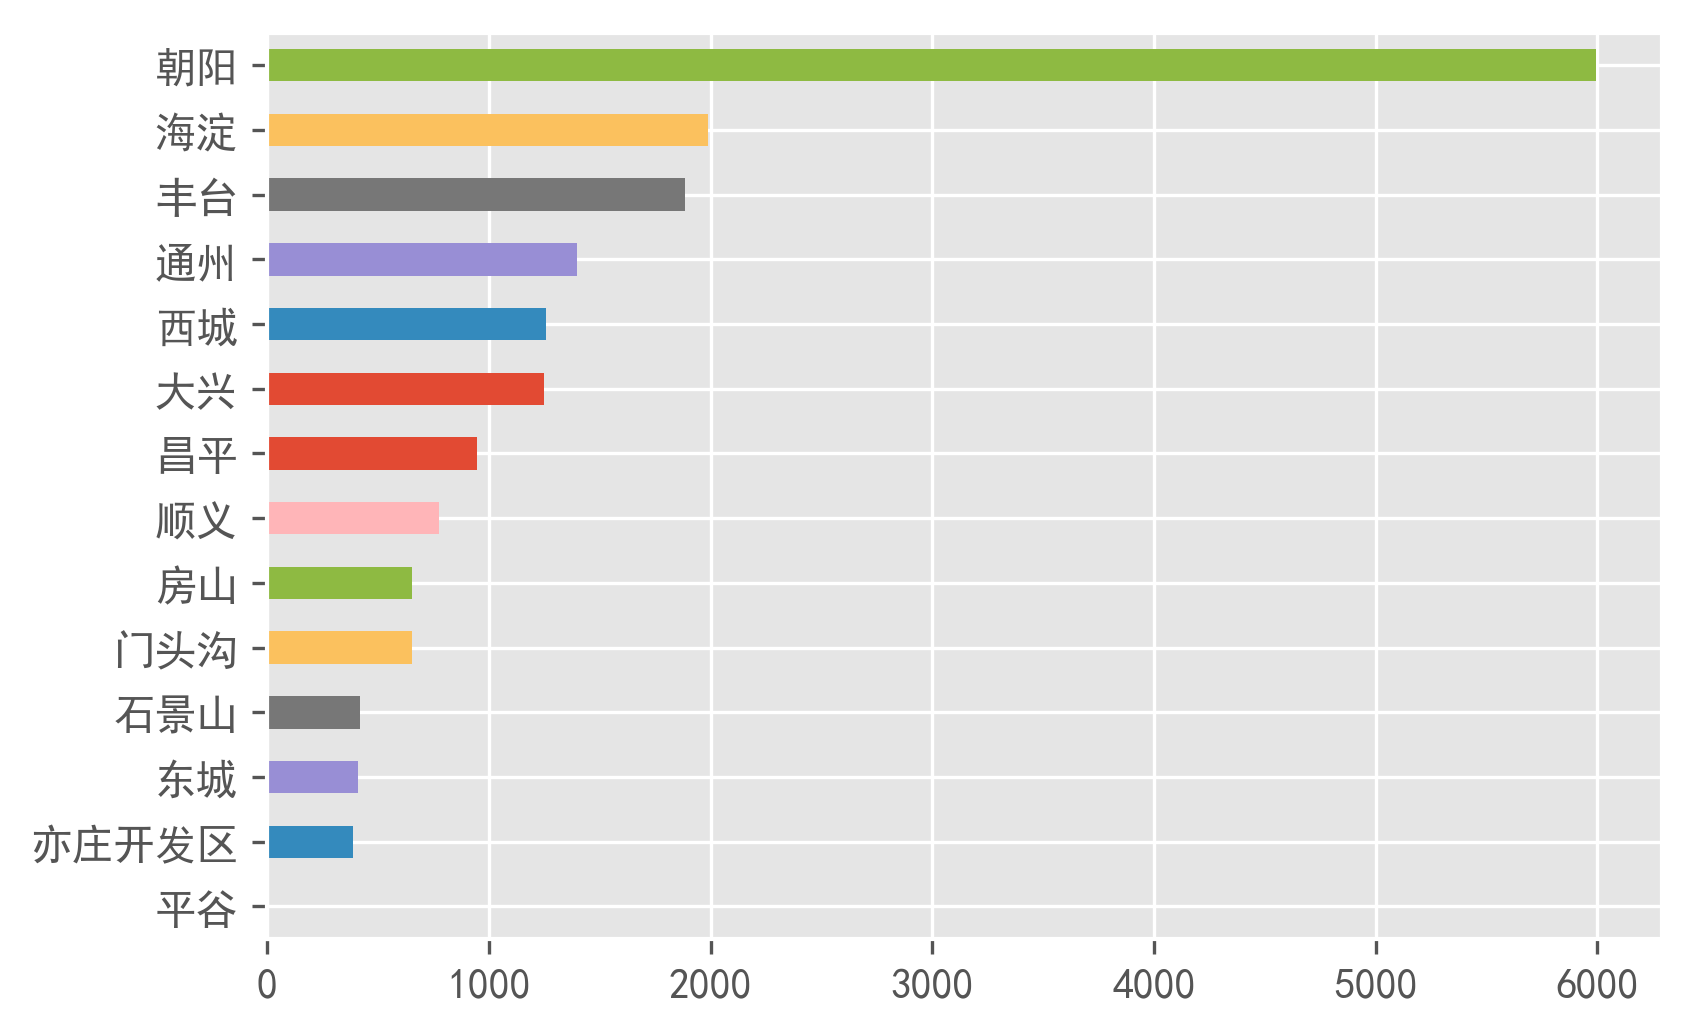

In [31]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='北京']['dist'].value_counts(ascending=True).plot.barh()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


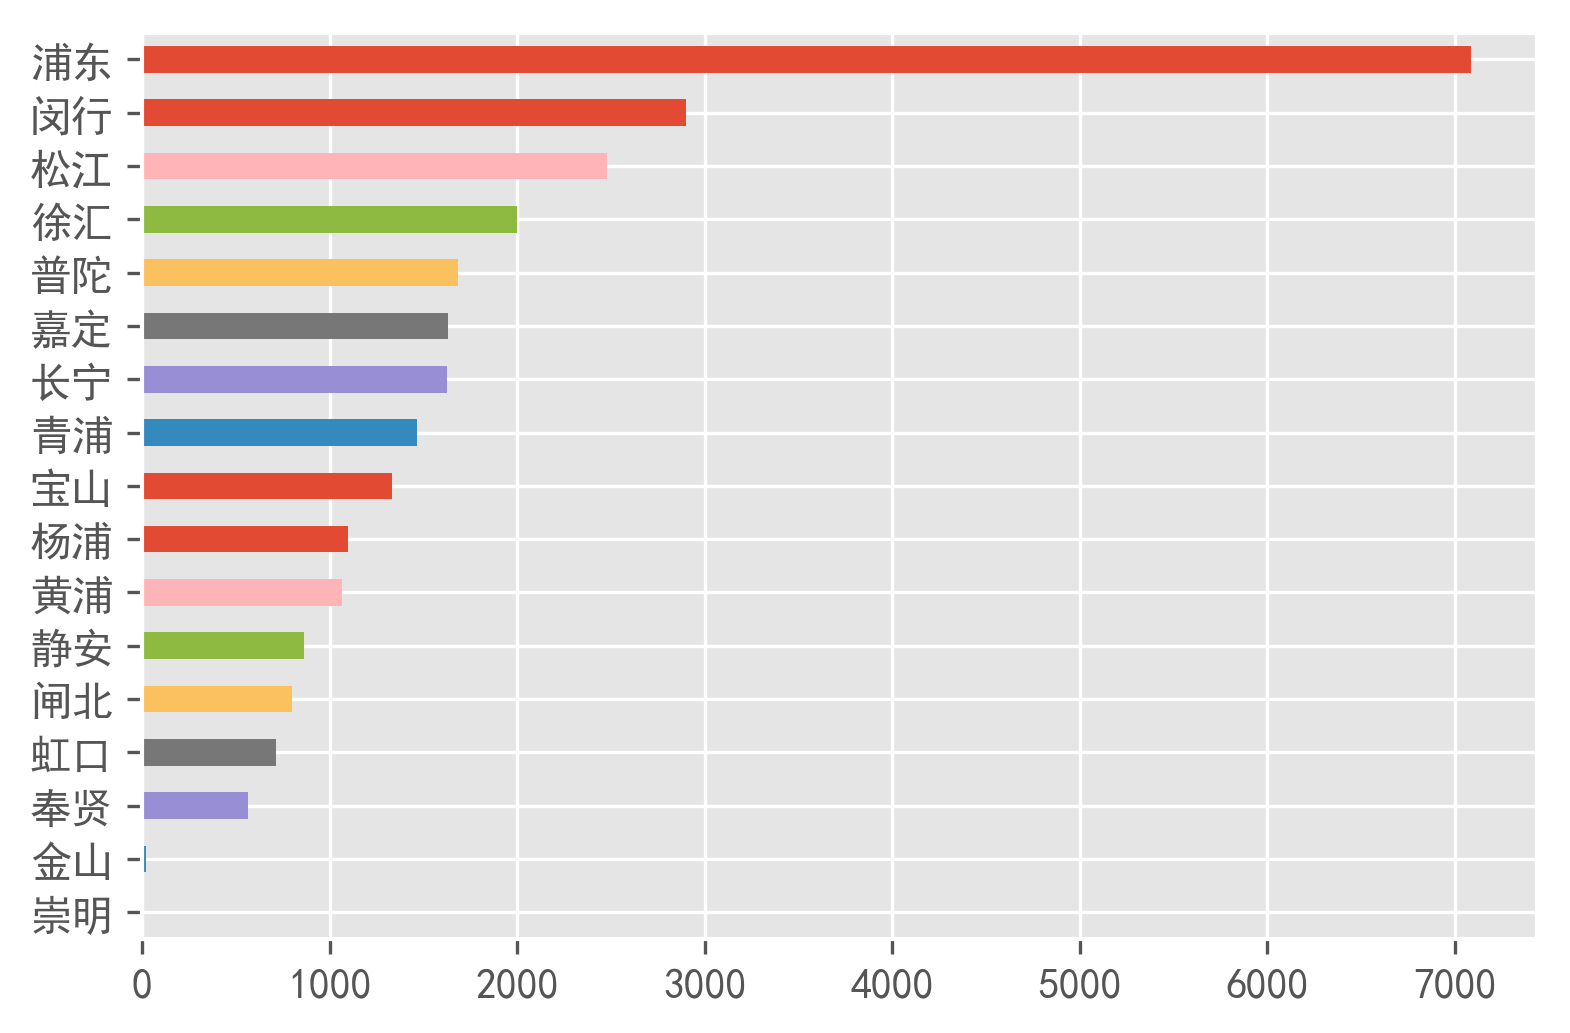

In [32]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='上海']['dist'].value_counts(ascending=True).plot.barh()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


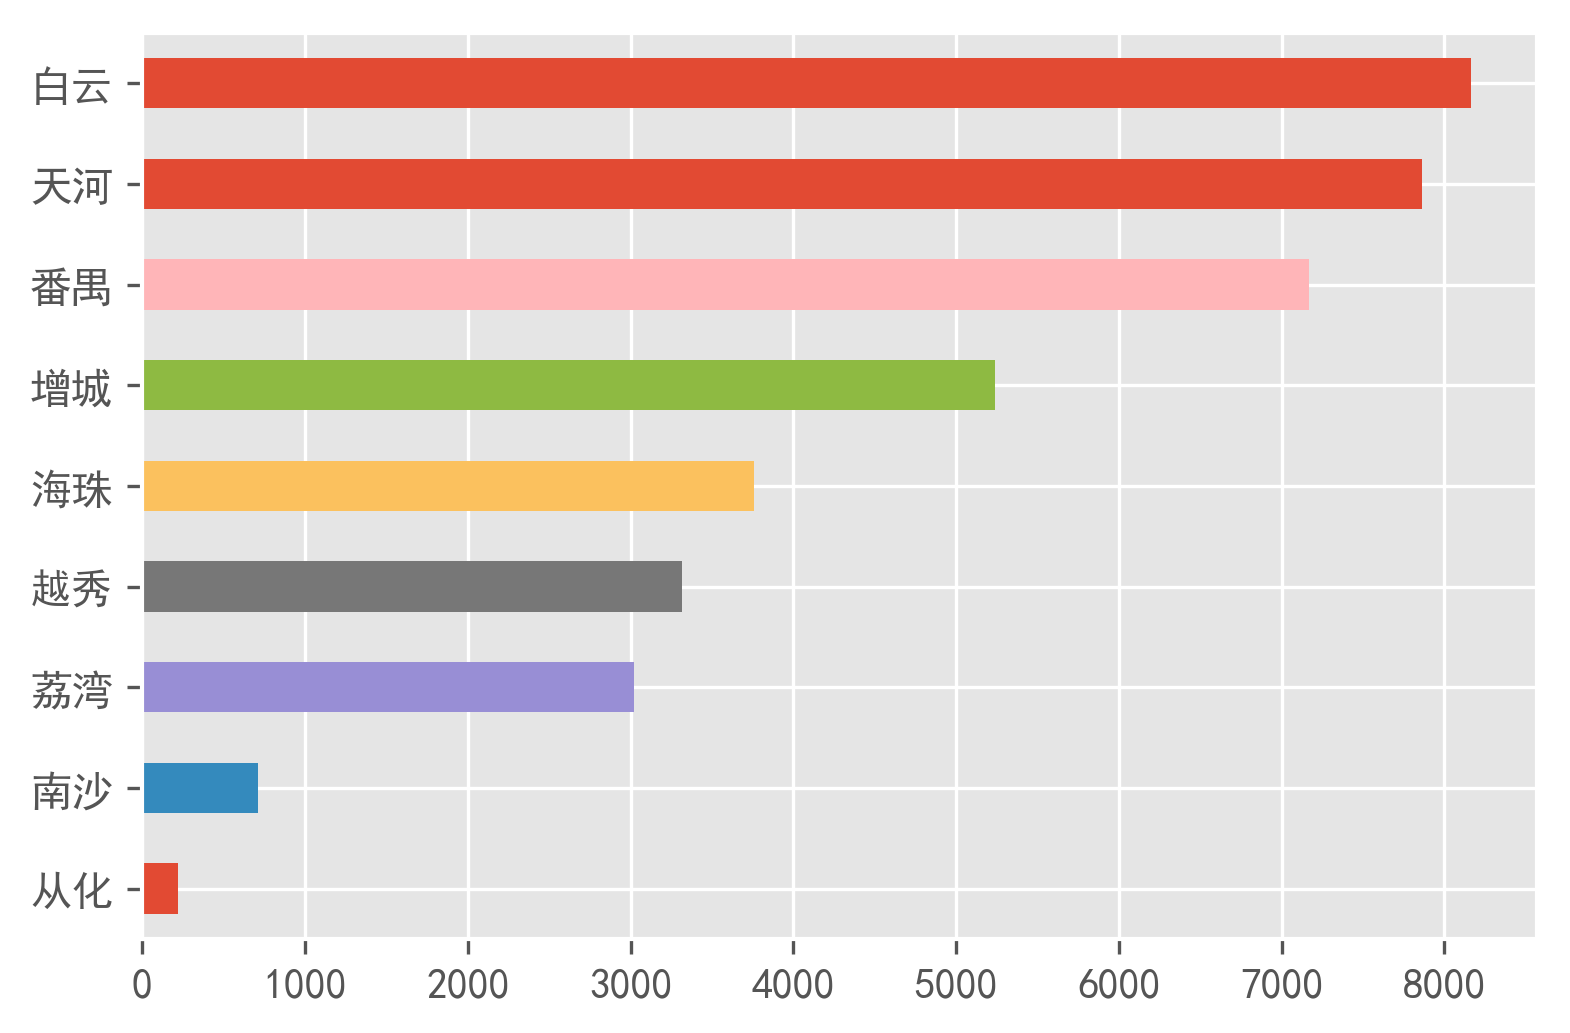

In [33]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='广州']['dist'].value_counts(ascending=True).plot.barh()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


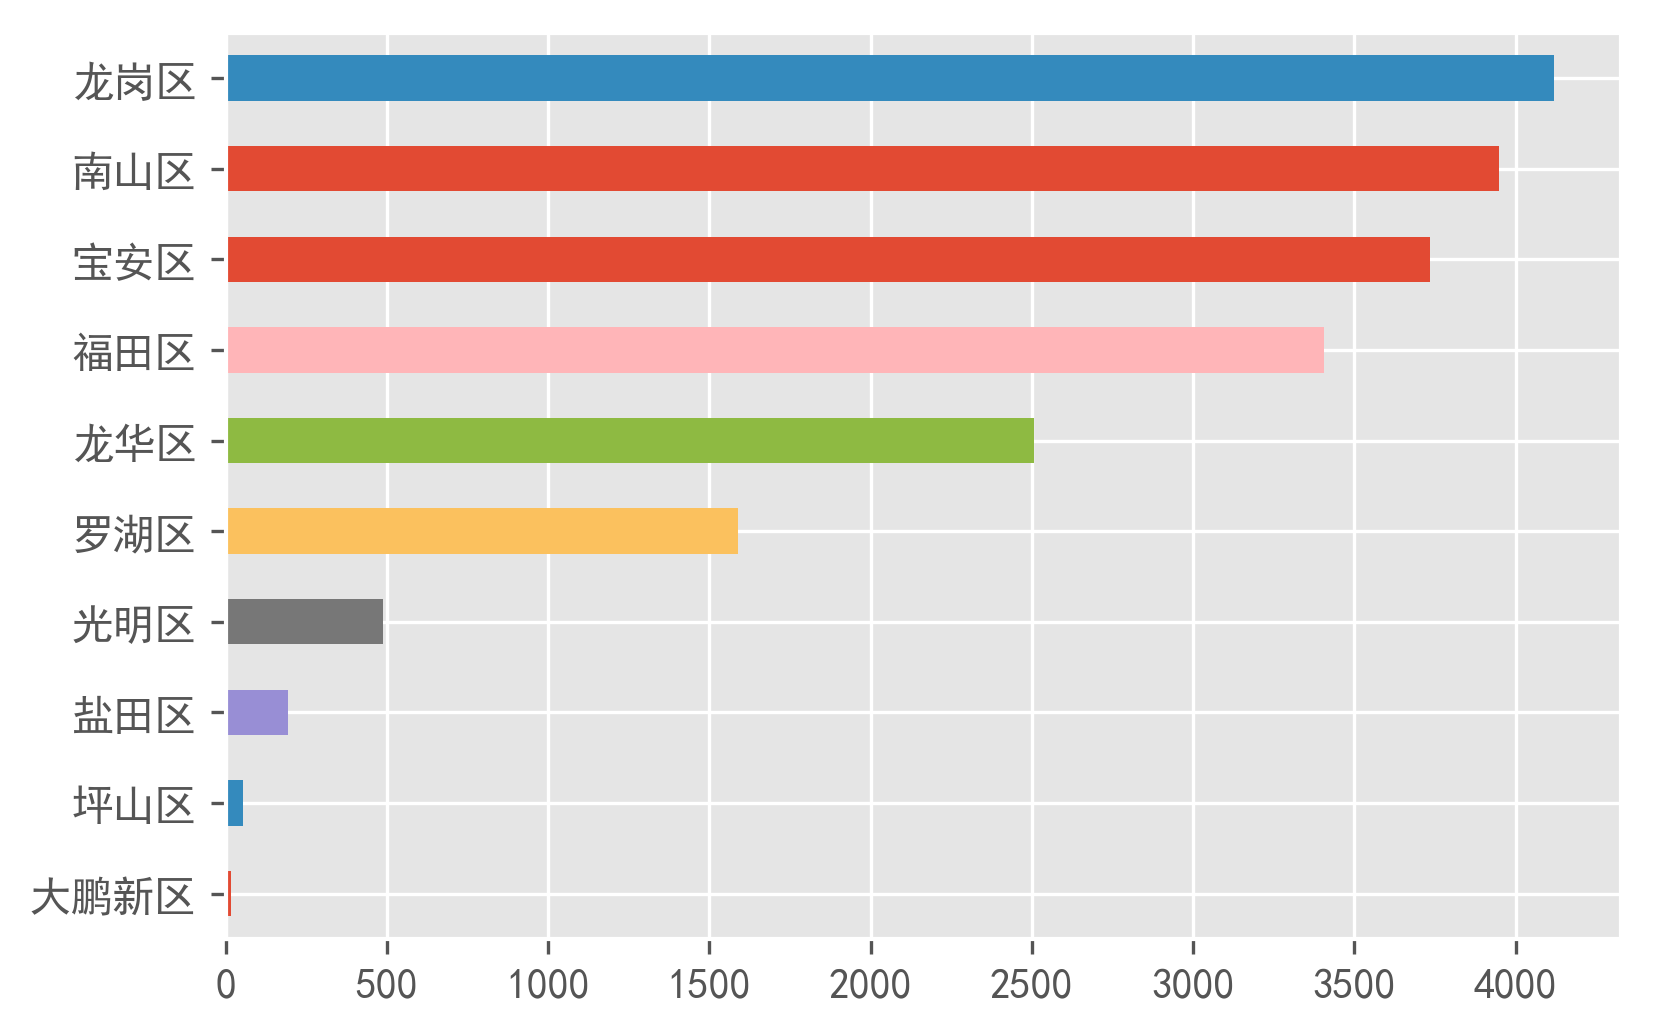

In [34]:
fig = plt.figure(dpi=300)
data.dropna(subset=['latitude', 'longitude'])[data['city']=='深圳']['dist'].value_counts(ascending=True).plot.barh()

### 2. 城市各区域的房价分布怎么样？

In [35]:
data['aver_price'] = np.round(data['rent_price_listing'] / data['rent_area'], 1)

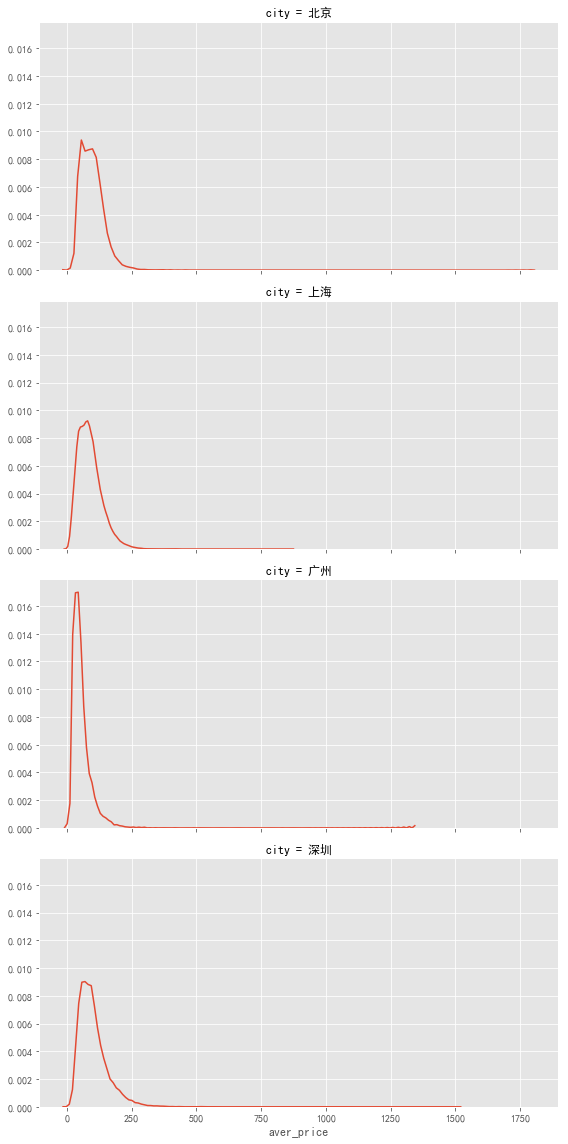

In [36]:
g = sns.FacetGrid(data, row="city", height=4, aspect=2)
g = g.map(sns.kdeplot, "aver_price")

In [37]:
# 由于平均租金基本上都集中在250元/平米/月以内，所以选取这部分数据绘制热力图
def get_city_zf_aver_price(city, city_short, col=['longitude', 'latitude', 'aver_price'], data=data):
    file_name = 'data_' + city_short + '_aver_price.csv'
    data_latlon = data.loc[(data['city']==city)&(data['aver_price']<=250), col].dropna(subset=['latitude', 'longitude'])
    data_latlon['longitude'] = data_latlon['longitude'].astype(str)
    data_latlon['latitude'] = data_latlon['latitude'].astype(str)
    data_latlon['latlon'] = data_latlon['longitude'].str.cat(data_latlon['latitude'], sep=',')
    data_latlon.to_csv(file_name, index=False)
    print(city+'的数据一共有{}条'.format(data_latlon.shape[0]))

In [38]:
get_city_zf_aver_price('北京', 'bj')
get_city_zf_aver_price('上海', 'sh')
get_city_zf_aver_price('广州', 'gz')
get_city_zf_aver_price('深圳', 'sz')

北京的数据一共有17868条
上海的数据一共有27161条
广州的数据一共有39333条
深圳的数据一共有19655条


In [39]:
# 各城市租金Top10的商圈
bc_top10 = data.groupby(['city', 'bizcircle_name'])['aver_price'].mean().nlargest(50).reset_index()['city'].value_counts()

In [261]:
from pyecharts import Bar

bar = Bar("每平米平均租金前50的北上广深商圈数量", width=400)
bar.add("", bc_top10.index, bc_top10.values, is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, is_label_show=True)
bar

In [264]:
def get_top10_bc(city, data=data):
    top10_bc = data[(data['city']==city)&(data['bizcircle_name']!='')].groupby('bizcircle_name')['aver_price'].mean().nlargest(10)
    bar = Bar(city+"市每平米平均租金Top10的商圈", width=600)
    bar.add("", top10_bc.index, np.round(top10_bc.values, 0), is_stack=True,
       xaxis_label_textsize=16, yaxis_label_textsize=16, xaxis_rotate=30, is_label_show=True)
    return bar

In [265]:
# 北京每平米平均租金Top10的商圈
get_top10_bc('北京')

In [266]:
get_top10_bc('上海')

In [267]:
get_top10_bc('广州')

In [268]:
get_top10_bc('深圳')

### 3. 距离地铁口远近有什么关系？

In [46]:
from scipy import stats

In [47]:
def distance_price_relation(city, data=data):
    g = sns.jointplot(x="distance", 
                  y="aver_price", 
                  data=data[(data['city']==city)&
                            (data['aver_price']<=350)].dropna(subset=['distance']), 
                  kind="reg",
                 stat_func=stats.pearsonr)
    g.fig.set_dpi(100)
    g.ax_joint.set_xlabel('最近地铁距离', fontweight='bold')
    g.ax_joint.set_ylabel('每平米租金', fontweight='bold')
    return g

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


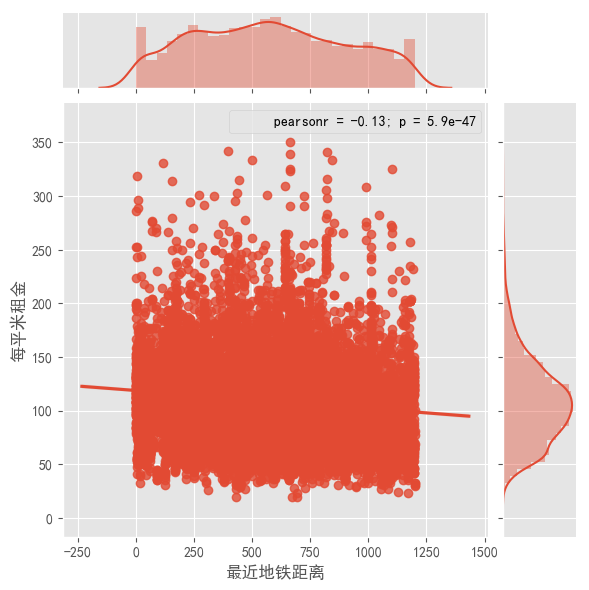

In [48]:
distance_price_relation('北京')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


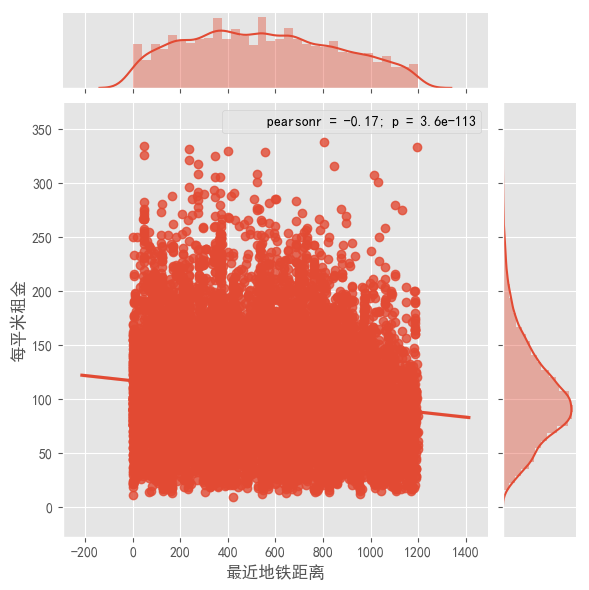

In [49]:
distance_price_relation('上海')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


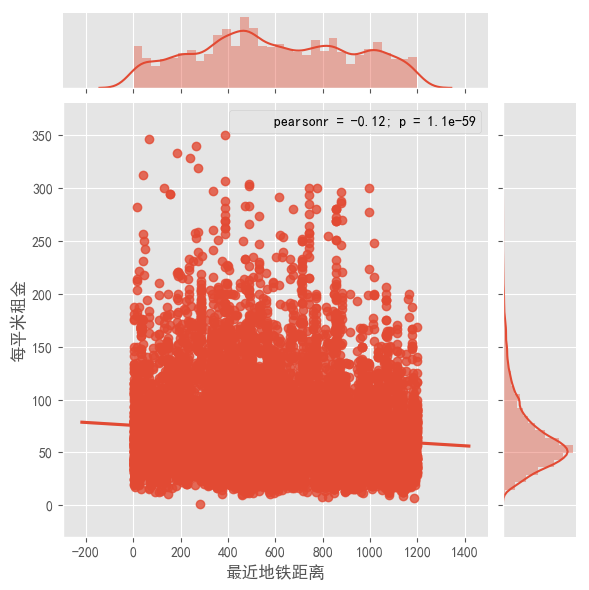

In [50]:
distance_price_relation('广州')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


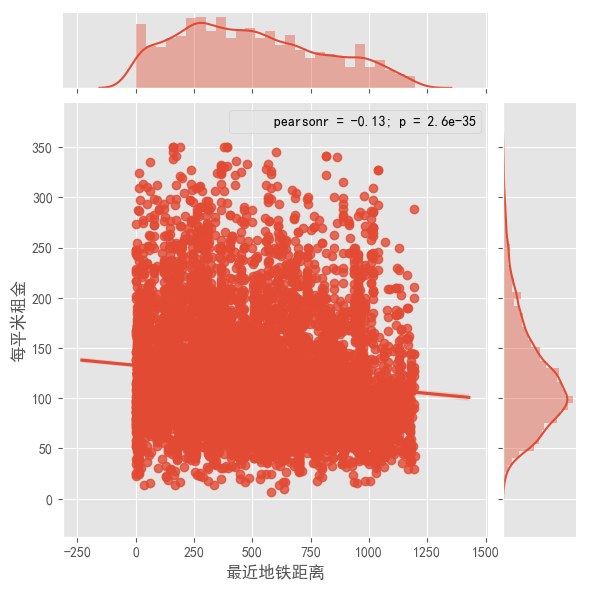

In [51]:
distance_price_relation('深圳')

In [52]:
bins = [100*i for i in range(13)]
data['bin'] = pd.cut(data.dropna(subset=['distance'])['distance'], bins)

In [53]:
bin_bj = data[data['city']=='北京'].groupby('bin')['aver_price'].mean()
bin_sh = data[data['city']=='上海'].groupby('bin')['aver_price'].mean()
bin_gz = data[data['city']=='广州'].groupby('bin')['aver_price'].mean()
bin_sz = data[data['city']=='深圳'].groupby('bin')['aver_price'].mean()

In [54]:
from pyecharts import Line


line = Line("距离地铁远近跟每平米租金均价的关系")
for city, bin_data in {'北京':bin_bj, '上海':bin_sh, '广州':bin_gz, '深圳':bin_sz}.items():
    line.add(city, bin_data.index, bin_data.values,
            legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
             xaxis_rotate=20, yaxis_min=8, legend_top=30)
line

In [269]:
134.6-117

17.599999999999994

### 4. 房屋大小对每平米租金的影响如何？

In [87]:
def area_price_relation(city, data=data):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="rent_area",
                     y="aver_price",
                     data=data[(data['city']==city)&(data['rent_area']<150)],
                     ci=None)
    g.set_xlabel('面积', fontweight='bold')
    g.set_ylabel('每平米均价', fontweight='bold')
    return g

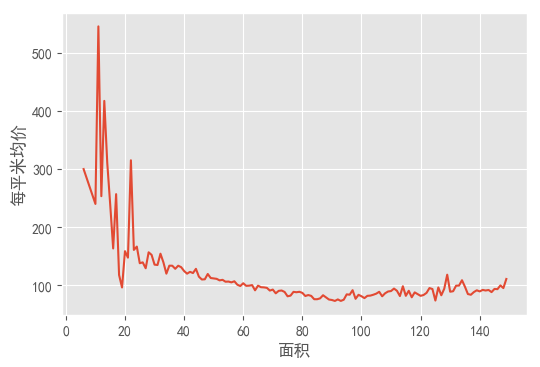

In [88]:
area_price_relation('北京')

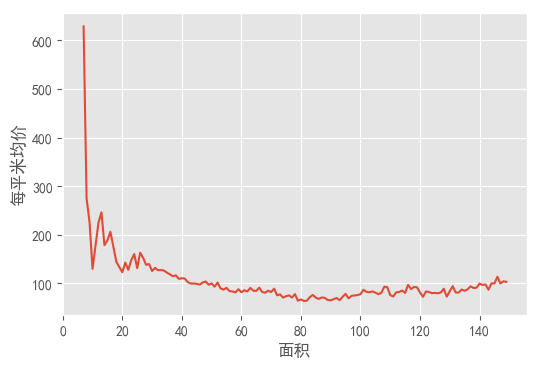

In [89]:
area_price_relation('上海')

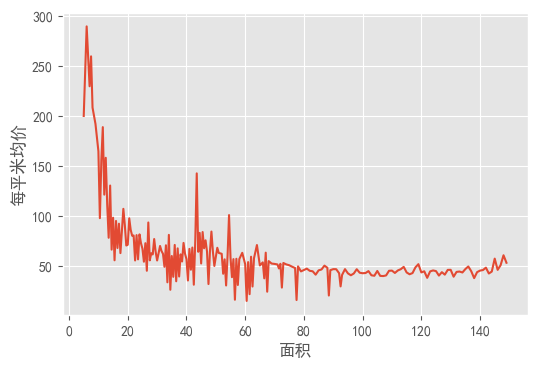

In [90]:
area_price_relation('广州')

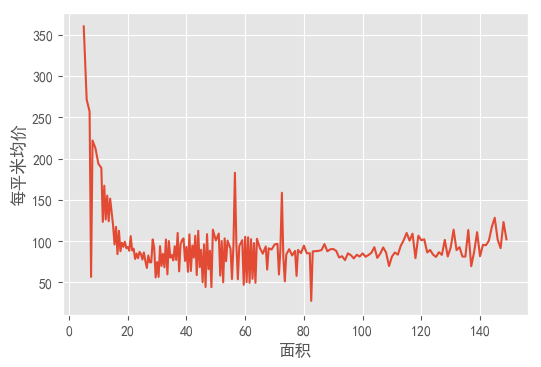

In [91]:
area_price_relation('深圳')

In [116]:
# 根据house_title和house_tag再造一个字段：is_dep，也就是“是否是公寓”
data['is_dep'] = (data['house_title'].str.contains('公寓') + data['house_tag'].str.contains('公寓')) > 0

In [270]:
# 每个城市房源的公寓占比
for city in ['北京', '上海', '广州', '深圳']:
    print(city+'的公寓占总房源量比重为:{}%。'.format(
        np.round(data[data['city']==city]['is_dep'].mean()*100, 2)))

北京的公寓占总房源量比重为:1.79%。
上海的公寓占总房源量比重为:3.7%。
广州的公寓占总房源量比重为:20.01%。
深圳的公寓占总房源量比重为:50.53%。


In [132]:
data[(data['city']=='广州')&
    (data['rent_area']>0)&
    (data['rent_area']<60)&
    (data['aver_price']>100)]['is_dep'].mean()

0.31666666666666665

### 5. 租个人房源好还是公寓好？

In [171]:
is_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==1)].groupby('city')['aver_price'].mean()
not_dep = data[(data['city'].isin(['广州','深圳']))&
             (data['is_dep']==0)].groupby('city')['aver_price'].mean()

In [172]:
bar = Bar("个人房源和公寓的每平米租金差别", width=600)
bar.add("个人房源", not_dep.index, np.round(not_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("公寓", is_dep.index, np.round(is_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 5. 精装和简装对房子价格的影响

In [153]:
data['decorated'] = data[data['house_tag'].notna()]['house_tag'].str.contains('精装')

In [160]:
decorated = data[data['decorated']==1].groupby('city')['aver_price'].mean()

In [161]:
not_decorated = data[data['decorated']==0].groupby('city')['aver_price'].mean()

In [166]:
bar = Bar("各城市精装和简装的每平米租金差别", width=600)
bar.add("精装(刷过墙)", decorated.index, np.round(decorated.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装(破房子)", not_decorated.index, np.round(not_decorated.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

In [180]:
is_dec_dep = data[(data['decorated']==1)&
                  (data['is_dep']==1)&
                 (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [181]:
is_dec_not_dep = data[(data['decorated']==1)&
                      (data['is_dep']==0)&
                     (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [182]:
not_dec_dep = data[(data['decorated']==0)&
                   (data['is_dep']==0)&
                  (data['city'].isin(['广州', '深圳']))].groupby('city')['aver_price'].mean()

In [183]:
bar = Bar("各城市装修和房源类型的每平米租金差别", width=600)
bar.add("精装公寓", is_dec_dep.index, np.round(is_dec_dep.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("精装个人房源", is_dec_not_dep.index, np.round(is_dec_not_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar.add("简装个人房源", not_dec_dep.index, np.round(not_dec_dep.values, 0),
       legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 7. 北方集中供暖对价格的影响

In [190]:
data['ct_heating'] = data['house_tag'].str.contains('集中供暖')

In [195]:
data[data['city']=='北京'].groupby('ct_heating')['aver_price'].mean()

ct_heating
False     91.638957
True     100.183416
Name: aver_price, dtype: float64

### 8. 各城市房屋租售比

In [219]:
zs_ratio = [57036, 62779, 32039, 56758]/(data.groupby('city')['rent_price_listing'].sum()/data.groupby('city')['rent_area'].sum())/12

In [224]:
bar = Bar("各城市房屋租售比(租多少年可以在该城市买下一套房)", width=450)
bar.add("", zs_ratio.index, np.round(zs_ratio.values, 0), 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
bar

### 9. 北上广深租房时都看重什么？

In [282]:
def layout_top3(city, data):
    layout_data = data[data['city']==city]['layout'].value_counts().nlargest(3)
    bar = Bar(city+"最受欢迎的户型", width=600)
    bar.add("", layout_data.index, layout_data.values, 
        legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
        xaxis_rotate=20, yaxis_min=8, legend_top=30, is_label_show=True)
    return bar

In [283]:
layout_top3('北京', data)

In [284]:
layout_top3('上海', data)

In [285]:
layout_top3('广州', data)

In [286]:
layout_top3('深圳', data)

In [247]:
from pyecharts import WordCloud

In [256]:
bj_tag = []
for st in data[data['city']=='北京'].dropna(subset=['house_tag'])['house_tag']:
    bj_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(bj_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

In [257]:
sh_tag = []
for st in data[data['city']=='上海'].dropna(subset=['house_tag'])['house_tag']:
    sh_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(sh_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

In [259]:
gz_tag = []
for st in data[data['city']=='广州'].dropna(subset=['house_tag'])['house_tag']:
    gz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(gz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud

In [287]:
sz_tag = []
for st in data[data['city']=='深圳'].dropna(subset=['house_tag'])['house_tag']:
    sz_tag.extend(st.split(' '))

name, value = WordCloud.cast(Counter(sz_tag))
wordcloud = WordCloud(width=500, height=500)
wordcloud.add("", name, value, word_size_range=[20, 100])
wordcloud